In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2022_subs.csv")
df

,date,team,subs,minutes,result,goal_differential,total_minutes,sub_goals,sub_assists
0,2022-04-29,LA,1,[82],W,1,82,0,0
1,2022-04-29,NC,3,"[76, 77, 90]",L,-1,243,0,0
2,2022-04-30,POR,5,"[46, 46, 74, 81, 82]",W,3,329,1,0
3,2022-04-30,KC,5,"[19, 46, 65, 65, 74]",L,-3,269,0,0
4,2022-04-30,CHI,4,"[46, 61, 70, 80]",W,1,257,0,0
...,...,...,...,...,...,...,...,...,...
259,2022-10-01,KC,2,"[64, 73]",L,-1,137,0,0
260,2022-10-01,RGN,5,"[60, 62, 73, 78, 78]",W,3,351,0,0
261,2022-10-01,ORL,5,"[56, 56, 56, 65, 75]",L,-3,308,0,0
262,2022-10-02,CHI,3,"[74, 88, 90]",W,2,252,0,0


In [3]:
df.groupby(["team", "subs"]).count()

date  minutes  result  goal_differential  total_minutes  sub_goals  \
team subs                                                                       
CHI  3        2        2       2                  2              2          2   
     4       13       13      13                 13             13         13   
     5        7        7       7                  7              7          7   
HOU  3        4        4       4                  4              4          4   
     4        3        3       3                  3              3          3   
     5       15       15      15                 15             15         15   
KC   2        3        3       3                  3              3          3   
     3        2        2       2                  2              2          2   
     4        4        4       4                  4              4          4   
     5       13       13      13                 13             13         13   
LA   1        2        2       2                  2              2          2   
     2        3        3       3                  3              3          3   
     3        4        4       4                  4              4          4   
     4       11       11      11                 11             11         11   
     5        2        2       2                  2              2          2   
LOU  2        6        6       6                  6              6          6   
     3        4        4       4                  4              4          4   
     4        7        7       7                  7              7          7   
     5        5        5       5                  5              5          5   
NC   2        1        1       1                  1              1          1   
     3        7        7       7                  7              7          7   
     4        6        6       6                  6              6          6   
     5        8        8       8                  8              8          8   
NJY  3        7        7       7                  7              7          7   
     4        6        6       6                  6              6          6   
     5        9        9       9                  9              9          9   
ORL  2        1        1       1                  1              1          1   
     4       10       10      10                 10             10         10   
     5       11       11      11                 11             11         11   
POR  3        7        7       7                  7              7          7   
     4        6        6       6                  6              6          6   
     5        9        9       9                  9              9          9   
RGN  2        3        3       3                  3              3          3   
     3        4        4       4                  4              4          4   
     4        6        6       6                  6              6          6   
     5        8        8       8                  8              8          8   
     6        1        1       1                  1              1          1   
SD   2        2        2       2                  2              2          2   
     3        7        7       7                  7              7          7   
     4        5        5       5                  5              5          5   
     5        8        8       8                  8              8          8   
WAS  1        1        1       1                  1              1          1   
     2        5        5       5                  5              5          5   
     3        2        2       2                  2              2          2   
     4        6        6       6                  6              6          6   
     5        5        5       5                  5              5          5   
     6        3        3       3                  3              3          3   

           sub_assists  
team subs       

In [4]:
df.groupby(["team"]).mean("subs").sort_values("subs")

,subs,goal_differential,total_minutes,sub_goals,sub_assists
team,,,,,
LA,3.363636,-0.181818,239.590909,0.090909,0.045455
LOU,3.500000,-0.545455,248.727273,0.181818,0.000000
WAS,3.818182,-0.318182,253.500000,0.136364,0.136364
SD,3.863636,0.500000,248.681818,0.227273,0.409091
NC,3.954545,0.590909,295.681818,0.227273,0.090909
RGN,4.000000,0.590909,293.409091,0.136364,0.000000
NJY,4.090909,-1.363636,285.772727,0.090909,0.136364
POR,4.090909,1.136364,293.409091,0.318182,0.181818
CHI,4.227273,0.272727,292.181818,0.181818,0.090909


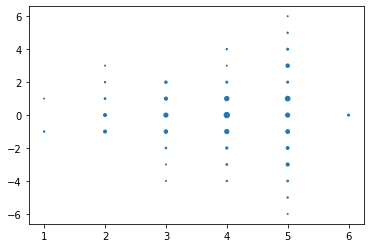

In [5]:
df2 = df.groupby(["subs", "goal_differential"]).agg(count= ("date", "count"))
plt.scatter(df2.index.get_level_values(0), df2.index.get_level_values(1), s=df2["count"])

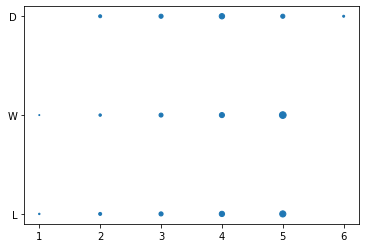

In [6]:
df3 = df.groupby(["subs", "result"]).agg(count= ("date", "count"))
plt.scatter(df3.index.get_level_values(0), df3.index.get_level_values(1), s=df3["count"])

In [7]:
def extract_from_list(minutes, i):
    minutes_list = json.loads(minutes)
    return minutes_list[i] if i < len(minutes_list) else None

for i in range(0,6):
    df["sub_" + str(i)] = df["minutes"].apply(lambda x: extract_from_list(x, i))

df

,date,team,subs,minutes,result,goal_differential,total_minutes,sub_goals,sub_assists,sub_0,sub_1,sub_2,sub_3,sub_4,sub_5
0,2022-04-29,LA,1,[82],W,1,82,0,0,82,NaN,NaN,NaN,NaN,NaN
1,2022-04-29,NC,3,"[76, 77, 90]",L,-1,243,0,0,76,77.0,90.0,NaN,NaN,NaN
2,2022-04-30,POR,5,"[46, 46, 74, 81, 82]",W,3,329,1,0,46,46.0,74.0,81.0,82.0,NaN
3,2022-04-30,KC,5,"[19, 46, 65, 65, 74]",L,-3,269,0,0,19,46.0,65.0,65.0,74.0,NaN
4,2022-04-30,CHI,4,"[46, 61, 70, 80]",W,1,257,0,0,46,61.0,70.0,80.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-10-01,KC,2,"[64, 73]",L,-1,137,0,0,64,73.0,NaN,NaN,NaN,NaN
260,2022-10-01,RGN,5,"[60, 62, 73, 78, 78]",W,3,351,0,0,60,62.0,73.0,78.0,78.0,NaN
261,2022-10-01,ORL,5,"[56, 56, 56, 65, 75]",L,-3,308,0,0,56,56.0,56.0,65.0,75.0,NaN
262,2022-10-02,CHI,3,"[74, 88, 90]",W,2,252,0,0,74,88.0,90.0,NaN,NaN,NaN


In [8]:
df_agg = df.groupby(["team"]).agg(
    avg_subs=("subs", "mean"),
    sub_0_min=("sub_0", "mean"),
    sub_1_min=("sub_1", "mean"),
    sub_2_min=("sub_2", "mean"),
    sub_3_min=("sub_3", "mean"),
    sub_4_min=("sub_4", "mean"),
    sub_0_count=("sub_0", "count"),
    sub_1_count=("sub_1", "count"),
    sub_2_count=("sub_2", "count"),
    sub_3_count=("sub_3", "count"),
    sub_4_count=("sub_4", "count"),
)
df_agg

,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
team,,,,,,,,,,,
CHI,4.227273,54.954545,64.681818,72.818182,79.450000,86.428571,22,22,22,20,7
HOU,4.500000,58.954545,71.181818,79.818182,83.444444,87.466667,22,22,22,18,15
KC,4.227273,56.590909,66.954545,76.526316,80.529412,85.769231,22,22,19,17,13
LA,3.363636,53.545455,70.850000,79.882353,87.538462,90.000000,22,20,17,13,2
LOU,3.500000,56.181818,70.863636,77.812500,83.583333,85.800000,22,22,16,12,5
NC,3.954545,63.500000,73.181818,79.809524,82.714286,83.000000,22,22,21,14,8
NJY,4.090909,57.545455,65.863636,74.909091,79.200000,81.777778,22,22,22,15,9
ORL,4.409091,52.909091,60.363636,68.285714,77.047619,79.727273,22,22,21,21,11
POR,4.090909,60.090909,65.272727,76.954545,82.200000,85.666667,22,22,22,15,9


In [9]:
df_agg.to_csv("data/2022_subs_agg.csv")

In [14]:
df_goals = df.groupby(["team"]).agg(
    sub_goals=("sub_goals", "sum"),
    sub_assists=("sub_assists", "sum"),
    sub_minutes=("total_minutes", "sum"),
)
df_goals

,sub_goals,sub_assists,sub_minutes
team,,,
CHI,4,2,6428
HOU,5,1,7433
KC,4,4,6656
LA,2,1,5271
LOU,4,0,5472
NC,5,2,6505
NJY,2,3,6287
ORL,3,2,6421
POR,7,4,6455


In [15]:
df_goals["sub_goals_per_min"] = df_goals["sub_goals"] / df_goals["sub_minutes"]
df_goals["sub_assists_per_min"] = df_goals["sub_assists"] / df_goals["sub_minutes"]

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
CHI,4,2,6428,0.000622,0.000311
HOU,5,1,7433,0.000673,0.000135
KC,4,4,6656,0.000601,0.000601
LA,2,1,5271,0.000379,0.000190
LOU,4,0,5472,0.000731,0.000000
NC,5,2,6505,0.000769,0.000307
NJY,2,3,6287,0.000318,0.000477
ORL,3,2,6421,0.000467,0.000311
POR,7,4,6455,0.001084,0.000620


In [16]:
df_goals.sort_values("sub_goals_per_min")

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
NJY,2,3,6287,0.000318,0.000477
LA,2,1,5271,0.000379,0.000190
RGN,3,0,6455,0.000465,0.000000
ORL,3,2,6421,0.000467,0.000311
WAS,3,3,5577,0.000538,0.000538
KC,4,4,6656,0.000601,0.000601
CHI,4,2,6428,0.000622,0.000311
HOU,5,1,7433,0.000673,0.000135
LOU,4,0,5472,0.000731,0.000000


In [17]:
df_goals.sort_values("sub_assists_per_min")

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
LOU,4,0,5472,0.000731,0.000000
RGN,3,0,6455,0.000465,0.000000
HOU,5,1,7433,0.000673,0.000135
LA,2,1,5271,0.000379,0.000190
NC,5,2,6505,0.000769,0.000307
CHI,4,2,6428,0.000622,0.000311
ORL,3,2,6421,0.000467,0.000311
NJY,2,3,6287,0.000318,0.000477
WAS,3,3,5577,0.000538,0.000538
